# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani
## Group 17

## Assignment 2 - Classification

#### Original author: Tony Vu Nguyen (301286979) - tvn4@sfu.ca
#### Created: Mar 3, 2022
#### Modified: Mar 3, 2022

In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python


## 1. Getting Started

In [9]:
# Load dataset
df = pd.read_csv('datasets\heart_failure_dataset.csv', header=0)

In [10]:
## 1.1 Deceased patients (target) that had anaemia and were smokers (features)

df_d = df[df['death_event']==1] # Number of deceased patients
df_da = df_d[df_d['anaemia']==1] # Number of deceased patients with anemia
df_das = df_da[df_da['smoking']==1] # Number of deceased patients with anemia and were smokers

print('Percent of deceased patients that had anaemia and were smokers: %.1f%%' %(len(df_das)/len(df_d)*100))

Percent of deceased patients that had anaemia and were smokers: 12.5%


Mean CPK Levels of Alive Patients: 540
Mean CPK Levels of Dead Patients: 670


C:\Users\Tony\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0, 0.5, 'CPK Levels [mcg/L]')

<Figure size 432x288 with 0 Axes>

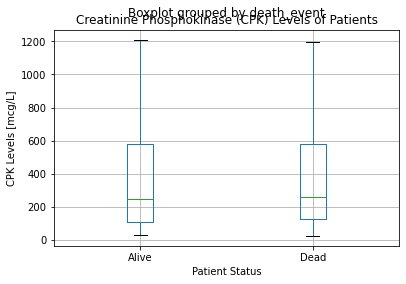

In [46]:
## 1.2a: Mean
df_a = df[df['death_event']==0]
df_CPK = df[['creatinine_phosphokinase', 'death_event']]
df_CPK['death_event'].replace({0:'Alive',1:'Dead'}, inplace=True)

CPK_mean = [df_a['creatinine_phosphokinase'].mean(), df_d['creatinine_phosphokinase'].mean()]
print('Mean CPK Levels of Alive Patients: %i'%CPK_mean[0])
print('Mean CPK Levels of Dead Patients: %i'%CPK_mean[1])

# Boxplot
plt.figure()
df_CPK.boxplot(by='death_event', showfliers=False)
plt.title('Creatinine Phosphokinase (CPK) Levels of Patients')
plt.xlabel('Patient Status')
plt.ylabel('CPK Levels [mcg/L]')

In [18]:
## 1.2b: T-test
from scipy.stats import ttest_ind
T, P = ttest_ind(df_a['creatinine_phosphokinase'],df_d['creatinine_phosphokinase'])

print("p-value =", P)
# if the p-value is less than 0.05 we have significant different between feature values
if P < 0.05:
    print("significant")
else:
    print("not significant")


p-value = 0.27961124573614
not significant


## 2. Logistic Regression

In [46]:
## Splitting data into 80/20 training/test split

# Split features and targets: F=Features, T=Targets
F = df
T = df['death_event']

# Splitting dataset into training and test sets
from sklearn.model_selection import train_test_split
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.2)

In [47]:
## 2.1 Model Training

# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiating the model (using the default parameters)
lr = LogisticRegression()

# Fitting the model with data
lr.fit(F_train,T_train)

# Save the Trained Model
pickle.dump(lr, open('Model_LogRegress.pkl', 'wb'))

# Predicting the labels on data set
Tp_train_lr = lr.predict(F_train)
Tp_test_lr = lr.predict(F_test) 

Confusion Matrix
 [[142  16]
 [ 48  33]]
Accuracy: 0.7322175732217573
Precision: 0.673469387755102
Recall: 0.4074074074074074
F1 Score: 0.5076923076923077


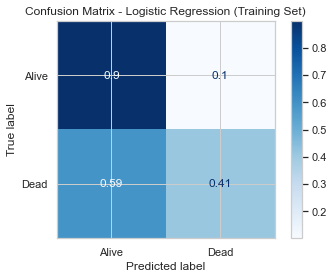

In [51]:
## 2.2 Model Evaluation - Training Set

# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm_train_lr = confusion_matrix(T_train, Tp_train_lr)
print('Confusion Matrix\n', cm_train_lr)

plt_cm_train_lr = plot_confusion_matrix(lr, F_train, T_train,
                                       display_labels=['Alive','Dead'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cm_train_lr.ax_.set_title('Confusion Matrix - Logistic Regression (Training Set)')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(T_train, Tp_train_lr))
print("Precision:",precision_score(T_train, Tp_train_lr))
print("Recall:",recall_score(T_train, Tp_train_lr))
print("F1 Score:",f1_score(T_train, Tp_train_lr))

Confusion Matrix
 [[42  3]
 [10  5]]
Accuracy: 0.7833333333333333
Precision: 0.625
Recall: 0.3333333333333333
F1 Score: 0.43478260869565216


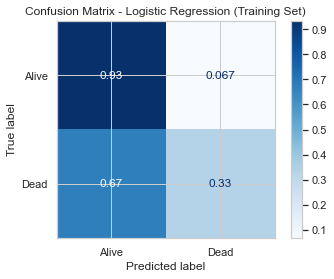

In [52]:
## 2.2 Model Evaluation - Test Set

cm_test_lr = confusion_matrix(T_test, Tp_test_lr)
print('Confusion Matrix\n', cm_test_lr)

plt_cm_test_lr = plot_confusion_matrix(lr, F_test, T_test,
                                       display_labels=['Alive','Dead'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cm_test_lr.ax_.set_title('Confusion Matrix - Logistic Regression (Training Set)')

# Print Evaluation Metrics
print("Accuracy:",accuracy_score(T_test, Tp_test_lr))
print("Precision:",precision_score(T_test, Tp_test_lr))
print("Recall:",recall_score(T_test, Tp_test_lr))
print("F1 Score:",f1_score(T_test, Tp_test_lr))

# 3. K-Nearest Neighbor

In [ ]:
## 3.1 Model Training
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Model creation and training (using the default parameters)
knn, Tp_test_knn = [], []


for i in range(10):
    knn[i] = KNeighborsClassifier(n_neighbors=(i+1))
    knn[i].fit(F_train,T_train)
    Tp_test_knn = knn[i].predict(X_test)

# Save the Trained Model
pickle.dump(MODEL_KNN, open('Model_KNeighborsClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data

In [ ]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report

labels = ['Alive','Dead']
def classifier_performance(model,T,F,Tp,index):
    print('Classification Report (k = %i):', )
    print(classification_report(T_test,Tp,target_names=labels))
    
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

In [ ]:
## 3.2 Model Evaluation - Training Set
# Print the Classification Report and Confusion Matrix

for i in range(10):
    classifier_performance(knn,Tp_train_knn)

In [ ]:
## 3.2 Model Evaluation - Test Set
for i in range(10):
    classifier_performance(knn,Tp_test_knn)

In [ ]:
## 3.3 Model Plotting


# 4. Feature Extraction

# 4. Multi-Class Evaluaton